Download Dataset

In [1]:
!wget https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip

--2025-11-03 11:51:55--  https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.0.166.52, 2600:1409:3c00:c8c::317f, 2600:1409:3c00:c80::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.0.166.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   102MB/s    in 8.4s    

2025-11-03 11:52:03 (93.2 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



Unzip dataset

In [2]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

Import modules

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img, img_to_array
warnings.filterwarnings('ignore')

create dataframe for Input and Output

In [9]:
input_path = []
label = []

for class_naame in os.listdir('PetImages'):
    for path in os.listdir('PetImages/' + class_naame):
      if class_naame == 'Dog':
        label.append(1)
      else:
        label.append(0)
      input_path.append(os.path.join('PetImages/', class_naame, path))
print(input_path[0],label[0])

PetImages/Dog/12447.jpg 1


In [11]:
len(label)

25002

In [13]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,PetImages/Cat/8283.jpg,0
1,PetImages/Cat/4954.jpg,0
2,PetImages/Dog/7159.jpg,1
3,PetImages/Cat/10347.jpg,0
4,PetImages/Dog/5418.jpg,1


In [39]:
#delete db files

for i in df['images']:
  if '.jpg' not in i:
    print(i)

In [41]:
import PIL
l =[]
for i in df['images']:
  try:
    img = PIL.Image.open(i)
  except:
    l.append(i)
l

['PetImages/Cat/666.jpg', 'PetImages/Dog/11702.jpg']

In [42]:
df=df[df['images']!='PetImages/Dog/Thumbs.db']
df=df[df['images']!='PetImages/Cat/Thumbs.db']
df=df[df['images']!='PetImages/Cat/666.jpg']
df=df[df['images']!='PetImages/Dog/11702.jpg']

EXplore data

In [16]:
#to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label'] == 1]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]
for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Dogs')
  plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [18]:
#to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label'] == 0]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]
for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Cats')
  plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

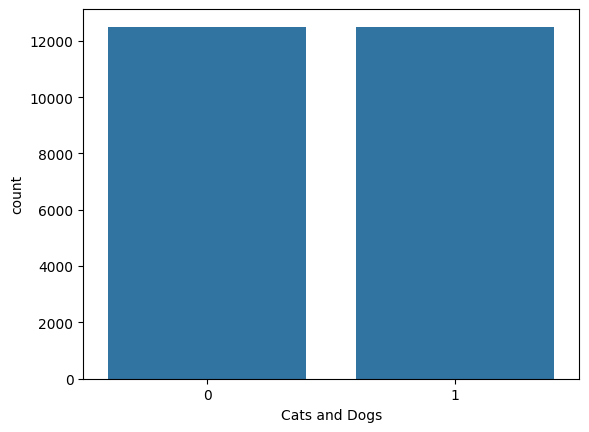

In [21]:
import seaborn as sns
sns.countplot(x='label', data=df)
plt.xlabel('Cats and Dogs')
plt.show()

create dataGenerator for images

In [43]:
df['label'] = df['label'].astype('str')

In [44]:
df.head()

,images,label
0,PetImages/Cat/8283.jpg,0
1,PetImages/Cat/4954.jpg,0
2,PetImages/Dog/7159.jpg,1
3,PetImages/Cat/10347.jpg,0
4,PetImages/Dog/5418.jpg,1


In [45]:
#input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [46]:
test.head()

,images,label
6868,PetImages/Dog/7711.jpg,1
22914,PetImages/Cat/6467.jpg,0
9669,PetImages/Dog/4934.jpg,1
13639,PetImages/Cat/6190.jpg,0
23341,PetImages/Dog/9980.jpg,1


In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_geneator = ImageDataGenerator(rescale=1./255,      #normalization of images
                                    rotation_range=40,   #augmenation to avoid overfitting
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest',
                                    )
val_generator = ImageDataGenerator(rescale=1./255)

train_iterator = train_geneator.flow_from_dataframe(train,
                                                    x_col='images',
                                                    y_col='label',
                                                    class_mode='binary',
                                                    target_size=(256,256),
                                                    batch_size=512
                                                    )

val_iterator = val_generator.flow_from_dataframe(test,
                                                    x_col='images',
                                                    y_col='label',
                                                    class_mode='binary',
                                                    target_size=(256,256),
                                                    batch_size=512
                                                    )

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


Model Creation

In [48]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    29,491,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,515,809 (112.59 MB)

 Trainable params: 29,515,809 (112.59 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
history = model.fit(train_iterator,
                    validation_data=val_iterator,
                    epochs=10)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 322s 8s/step - accuracy: 0.6203 - loss: 0.6547 - val_accuracy: 0.6500 - val_loss: 0.6252
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 317s 8s/step - accuracy: 0.6479 - loss: 0.6190 - val_accuracy: 0.6958 - val_loss: 0.5766
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 319s 8s/step - accuracy: 0.6954 - loss: 0.5764 - val_accuracy: 0.7108 - val_loss: 0.5555
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 317s 8s/step - accuracy: 0.7103 - loss: 0.5547 - val_accuracy: 0.7060 - val_loss: 0.5615
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 320s 8s/step - accuracy: 0.7169 - loss: 0.5495 - val_accuracy: 0.7190 - val_loss: 0.5392
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 348s 9s/step - accuracy: 0.7247 - loss: 0.5351 - val_accuracy: 0.7278 - val_loss: 0.5347
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 317s 8s/step - accuracy: 0.7279 - loss: 0.5338 - val_accuracy: 0.7384 - val_loss: 0.5217
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 318s 8s/step - accuracy: 0.7408 - loss: 0.5147 - val_accuracy: 0.7390 - v

visualization of Resuluts

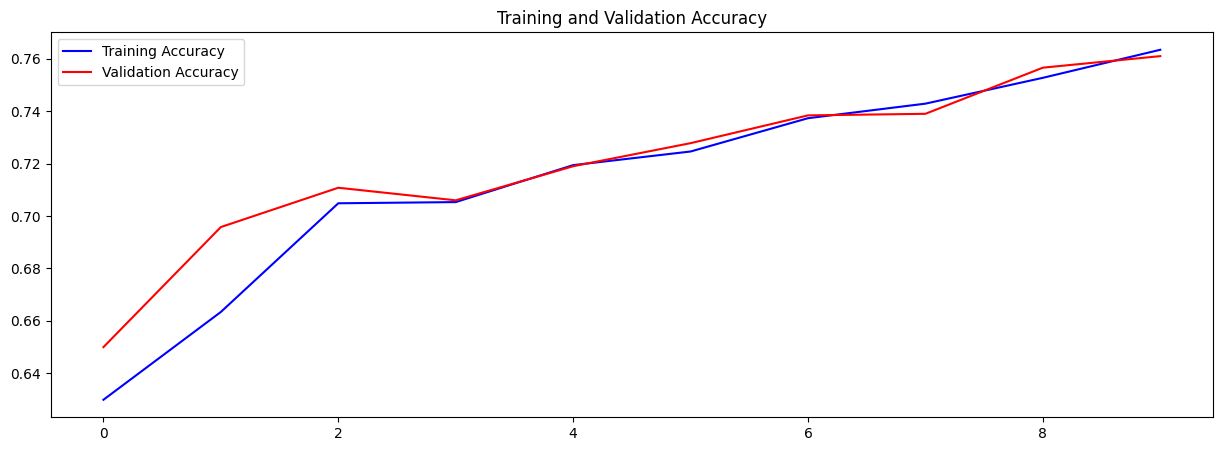

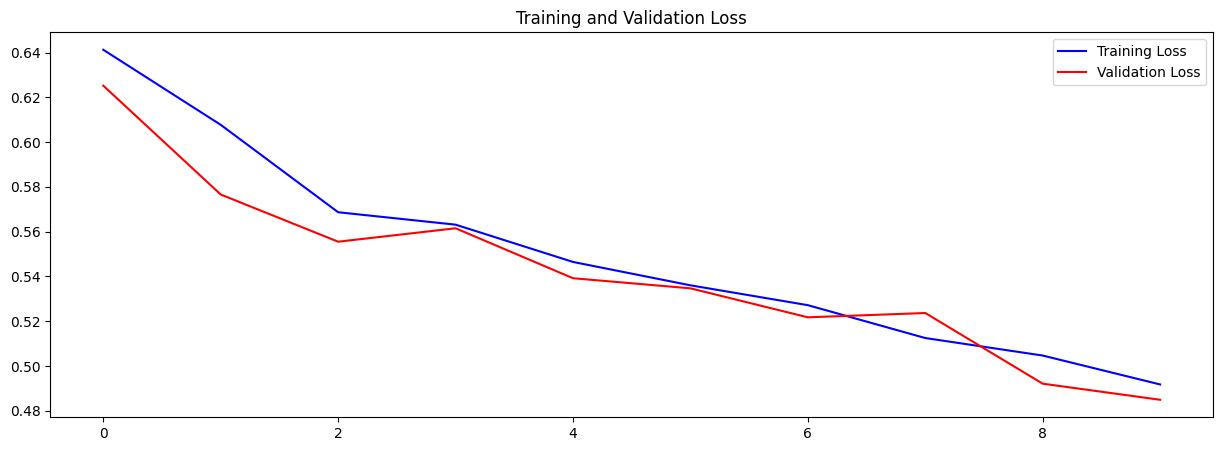

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.figure(figsize=(15,5))
plt.plot(epochs, acc,'b', label='Training Accuracy')
plt.plot(epochs, val_acc,'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(15,5))
plt.plot(epochs, loss,'b', label='Training Loss')
plt.plot(epochs, val_loss,'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


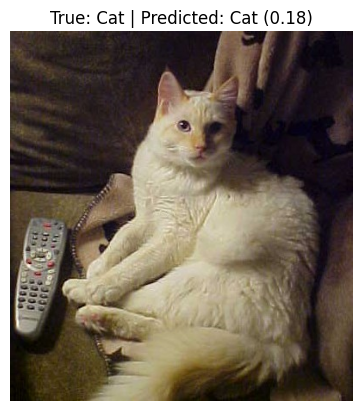

In [59]:
test_images = df['images']

# random image
random_image_path = random.choice(test_images)

# Load and preprocess
img = load_img(random_image_path, target_size=(256, 256))  # same as training size
img_array = img_to_array(img) / 255.0                     # normalize
img_array = np.expand_dims(img_array, axis=0)             # add batch dimension

# Make prediction
prediction = model.predict(img_array)

# Convert to label
pred_label = "Dog" if prediction[0][0] > 0.5 else "Cat"

true_label = "Dog" if df.loc[df['images'] == random_image_path, 'label'].values[0] == 1 else "Cat"

plt.imshow(load_img(random_image_path))
plt.title(f"True: {true_label} | Predicted: {pred_label} ({prediction[0][0]:.2f})")
plt.axis('off')
plt.show()
